In [6]:
# SOLUCIONADO!!!!!!!

In [16]:
import numpy as np
from PIL import Image
from queue import Queue
import pandas as pd
from scipy.optimize import least_squares
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.preprocessing import minmax_scale

def get_neighbors(pixel):
    neighbors = []
    for i in range(pixel[0]-1, pixel[0]+2):
        for j in range(pixel[1]-1, pixel[1]+2):
            if i >= 0 and j >= 0 and i < img.shape[0] and j < img.shape[1] and np.array_equal(img[i,j], np.array([255, 255, 255])):
                neighbors.append((i,j))
    return neighbors

def shortest_path(start, end, nodes, num_paths=1):
    nodes = set(nodes) - {start, end}
    visited = set()
    queue = Queue()
    queue.put([start])
    
    found_paths = []

    while not queue.empty() and len(found_paths) < num_paths:
        path = queue.get()
        node = path[-1]
        
        if node == end:
            found_paths.append(path)
        elif node not in visited:
            visited.add(node)
            for neighbor in get_neighbors(node):
                if neighbor not in nodes:
                    new_path = list(path)
                    new_path.append(neighbor)
                    queue.put(new_path)

    return found_paths
    
def count_duplicates(paths):
    path_counts = {}
    for path in paths:
        # Ignore empty paths
        if not path:
            continue
        # Ordena los caminos para considerar los caminos en orden inverso como iguales
        tuple_path = tuple(sorted(tuple(point) for point in path))
        
        if tuple_path in path_counts:
            path_counts[tuple_path] += 1
        else:
            path_counts[tuple_path] = 1

    # Filtra solo los caminos duplicados y sus conteos
    duplicate_paths = {path: count for path, count in path_counts.items() if count > 1}
    return duplicate_paths

def find_all_paths(start, end, nods, path=[]):
    path = path + [start]
    
    if start == end:
        return [path]
    
    if start in nods:
        return []
    
    paths = []
    neighbors = get_neighbors(start)
    
    for node in neighbors:
        if node not in path:
            new_paths = find_all_paths(node, end, nods, path)
            for p in new_paths:
                paths.append(p)
    
    return paths

def similarity(path1, path2):
    common_points = set(path1) & set(path2)
    return len(common_points) / min(len(path1), len(path2))

def dissimilar_path(shortest_path, all_paths):
    min_similarity = float('inf')
    dissimilar_path = None
    
    for path in all_paths:
        if path != shortest_path:
            sim = similarity(shortest_path, path)
            if sim < min_similarity:
                min_similarity = sim
                dissimilar_path = path
    
    return dissimilar_path


for frame_nb in range(0,26):
    id_=frame_nb+20
    f=frame_nb
    
#STRESS
    #path_file=r"C:\Users\Ander\Documents\TFM\PRUEBA_DLITE\handCorrection.tif".format(f)
    #img = np.array(Image.open(path_file))
    #path_carp = "C:\\Users\\Ander\\DLITE\\Notebooks\\Data\\PRUEBA\\PRUEBA_DLITE\\"
    #df = pd.read_excel("C:\\Users\\Ander\\Documents\\TFM\\PRUEBA_DLITE\\cells_data.xls",'bonds_data')

#ZASP
    #path_file=r"C:\Users\Ander\Documents\TFM\imagenes moscas\ZASP\4-\surface_projection\4- 22126 161222 RESTA_CROP.tif - T={}\handCorrection.tif".format(f)
    #img = np.array(Image.open(path_file))
    #path_carp = "C:\\Users\\Ander\\DLITE\\Notebooks\\Data\\PRUEBA\\PRUEBA_ZASP\\"
    #df = pd.read_excel("C:\\Users\\Ander\\Documents\\TFM\\imagenes moscas\\ZASP\\4-\\surface_projection\\cells_data.xls",'bonds_data')
#FRANJAS
    #path_file=r"C:\Users\Ander\Documents\TFM\imagenes moscas\Franjas miosina\n_21161 100321 -rolling ball- por t\MAX_prueba-roling_ball.tif - T={}\handCorrection.tif".format(f)
    #img = np.array(Image.open(path_file))
    #path_carp = "C:\\Users\\Ander\\DLITE\\Notebooks\\Data\\PRUEBA\\PRUEBA_FRANJAS\\"
    #df = pd.read_excel("C:\\Users\\Ander\\Documents\\TFM\\imagenes moscas\\Franjas miosina\\n_21161 100321 -rolling ball- por t\\cells_data.xls",'bonds_data')
    
#SIN MIOSINA
    #path_file=r"C:\Users\Ander\Documents\TFM\imagenes moscas\SIN MIOSINA\SIN_MIOSINA000{}\handCorrection.tif".format(f)
    #img = np.array(Image.open(path_file))
    #path_carp = "C:\\Users\\Ander\\DLITE\\Notebooks\\Data\\PRUEBA\\PRUEBA_SIN_MIOSINA\\"
    #df = pd.read_excel("C:\\Users\\Ander\\Documents\\TFM\\imagenes moscas\\SIN MIOSINA\\cells_data.xls",'bonds_data')

#MUCHA MIOSINA
    #path_file=r"C:\Users\Ander\Documents\TFM\imagenes moscas\MUCHA MIOSINA\Mucha Miosina\Mucha Miosina000{}\handCorrection.tif".format(f)
    #img = np.array(Image.open(path_file))
    #path_carp = "C:\\Users\\Ander\\DLITE\\Notebooks\\Data\\PRUEBA\\PRUEBA_MUCHA_MIOSINA\\"
    #df = pd.read_excel("C:\\Users\\Ander\\Documents\\TFM\\imagenes moscas\\MUCHA MIOSINA\\Mucha Miosina\\cells_data.xls",'bonds_data')
#SILVESTRE
    #path_file=r"C:\Users\Jon\Documents\Master Biofísica\TFM\PELIS MOSCAS - ORIGINALES\22126 271022 c381 ECadGFP\2-\2- filtro\2 - 22126 271022 001 - RESTA - horizontal - CROP - T={}\handCorrection.tif".format(id_)
    #img = np.array(Image.open(path_file))
    #path_carp = "C:\\Users\\Jon\\Documents\\Master Biofísica\\TFM\\CÓDIGO\\DLITE\\Notebooks\\Data\\PRUEBA\\PRUEBA_DEF\\"
    #df = pd.read_excel("C:\\Users\\Jon\\Documents\\Master Biofísica\\TFM\PELIS MOSCAS - ORIGINALES\\22126 271022 c381 ECadGFP\\2-\\cells_data.xls",'bonds_data')
#SILVESTRE 2
    path_file=r"C:\Users\Jon\Documents\Master Biofísica\TFM\PELIS MOSCAS - ORIGINALES\22126 271022 c381 ECadGFP\2-\2- filtro\2 - 22126 271022 001 - RESTA - horizontal - CROP - T={}\handCorrection.tif".format(id_)
    img = np.array(Image.open(path_file))
    path_carp = "C:\\Users\\Jon\\Documents\\Master Biofísica\\TFM\\CÓDIGO\\DLITE\\Notebooks\\Data\\PRUEBA\\PRUEBA_DEF\\"
    df = pd.read_excel("C:\\Users\\Jon\\Documents\\Master Biofísica\\TFM\PELIS MOSCAS - ORIGINALES\\22126 271022 c381 ECadGFP\\2-\\cells_data.xls",'bonds_data')
    
    
#ABLACIONES
    #path_file=r"C:\Users\Ander\Documents\TFM\imagenes moscas\Ablaciones17\UNIDOS\UNIDOS000{}\handCorrection.tif".format(f)
    #img = np.array(Image.open(path_file))
    #path_carp = "C:\\Users\\Ander\\DLITE\\Notebooks\\Data\\PRUEBA\\PRUEBA_UNIDOS\\"
    #df = pd.read_excel("C:\\Users\\Ander\\Documents\\TFM\\imagenes moscas\\Ablaciones17\\UNIDOS\\cells_data.xls",'bonds_data')
    
    df1= df[df['frame_nb'] == frame_nb]
    bonds=[]
    
    nodes_vx1 = set(zip(df1['vx_1_y'], df1['vx_1_x']))
    nodes_vx2 = set(zip(df1['vx_2_y'], df1['vx_2_x']))
    nodes = list(nodes_vx1 | nodes_vx2)
    bonds=[]
    for index, row in df1.iterrows():
        start=(row['vx_1_y'], row['vx_1_x'])
        end=(row['vx_2_y'], row['vx_2_x'])
        # Encontrar el camino más corto entre los vórtices sin pasar por otros nodos
        path = shortest_path(start, end, nodes)
        bonds.append(path)
        #print(path)
    
    bonds2 = []
    for sublist in bonds:
        bonds2.extend(sublist)

    duplicate_bonds = count_duplicates(bonds)
    print(duplicate_bonds)
    for i in range(len(duplicate_bonds)):
        start = list(duplicate_bonds)[i][0][0]
        end = list(duplicate_bonds)[i][0][-1]
        path = list(duplicate_bonds)[i][0]
        nodes1 = set(nodes) - {start, end}

        alt = find_all_paths(start, end, nodes1)
        ese = dissimilar_path(path, alt)
    
        bonds2.append(ese)

    # Eliminar elementos duplicados utilizando expresiones de conjunto
    bonds3 = list({tuple(path): path for path in bonds2}.values())
    #print(len(bonds3))
    # Genera el nombre del archivo
    nombre_archivo = "P-T{:02d}.txt".format(frame_nb)
    with open(path_carp+nombre_archivo, 'w') as archivo:
        df1 = df1.reset_index(drop=True)
        for i in range(len(bonds3)):
            path1=bonds3[i]
            # Abre el archivo de texto en modo adición
            with open(path_carp+nombre_archivo, 'a') as archivo:

                # Escribe la información de las coordenadas en el archivo de texto
                if len(path1)>1:
                    archivo.write(f'Tracing N{i+1}:\n')
                    for j in range(len(path1)-1):
                        archivo.write(f'{path1[j][1]},{path1[j][0]}\n')
                    archivo.write(f'{path1[-1][1]},{path1[-1][0]}\n')

{}
{}
{}
{}
{}
{(((191, 350), (191, 349), (191, 348), (192, 347), (193, 346), (194, 345), (195, 344), (196, 343), (197, 342), (198, 341), (199, 340), (199, 339), (200, 338), (201, 337), (202, 337), (203, 337), (204, 337), (205, 337), (206, 337)),): 2}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}


In [83]:
#QUITAR LO DE DENTRO EN TXT

<IPython.core.display.Javascript object>


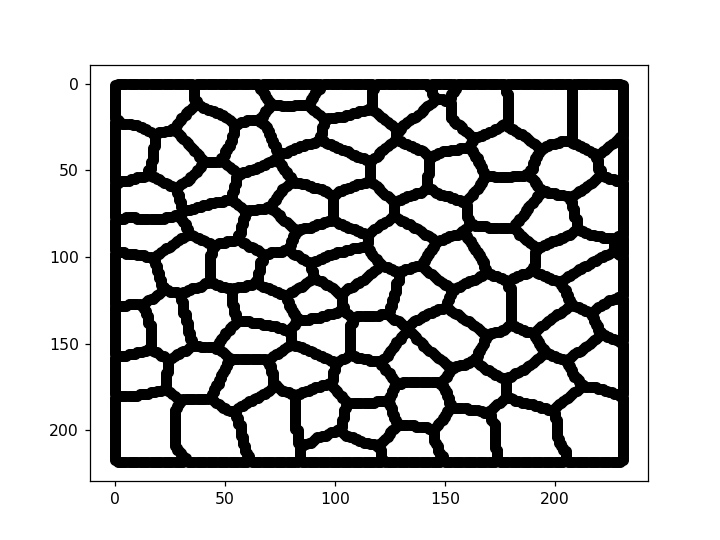

In [84]:
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np
from matplotlib.widgets import LassoSelector

# Define el archivo
filename = "C:\\Users\\Ander\\DLITE\\Notebooks\\Data\\PRUEBA\\PRUEBA_DLITE\\P-T00.txt"
filename_b = "C:\\Users\\Ander\\DLITE\\Notebooks\\Data\\PRUEBA\\PRUEBA_DLITE\\Prueba.txt"
# Inicializa listas para las coordenadas
x_coords = []
y_coords = []

# Abre el archivo y lee las líneas
with open(filename, 'r') as f:
    lines = f.readlines()

# Itera sobre las líneas
for line in lines:
    # Si la línea comienza con 'Tracing', ignórala
    if line.startswith('Tracing'):
        continue
    # Si no, separa la línea en x e y usando la coma como delimitador
    else:
        x, y = line.split(',')
        # Añade las coordenadas a las listas correspondientes
        x_coords.append(int(x))
        y_coords.append(int(y))

# Convierte las listas en arrays de numpy
x_coords = np.array(x_coords)
y_coords = np.array(y_coords)

# Crea un gráfico vacío
fig, ax = plt.subplots()

# Añade los puntos al gráfico
scatter = ax.scatter(x_coords, y_coords, color='black')

# Invierte el eje y para que coincida con el formato típico de imagen
ax.invert_yaxis()

# Define una función para seleccionar puntos
def select_points(verts):
    # Convierte los vértices en un Path
    path = mpath.Path(verts)
    # Obtiene las coordenadas de todos los puntos
    coordinates = np.column_stack([x_coords, y_coords])
    # Encuentra qué puntos están fuera del lazo
    mask = ~path.contains_points(coordinates)
    # Solo mantiene los puntos fuera del lazo
    new_x_coords = x_coords[mask]
    new_y_coords = y_coords[mask]
    # Escribe las nuevas coordenadas en el archivo
    with open(filename_b, 'w') as f:
        for x, y in zip(new_x_coords, new_y_coords):
            f.write(str(x) + ',' + str(y) + '\n')

# Crea el selector de lazo
lasso = LassoSelector(ax, select_points)

# Muestra el gráfico
plt.show()

In [86]:
import os
import csv
import re

# Nombre de archivos
filename = "C:\\Users\\Ander\\DLITE\\Notebooks\\Data\\PRUEBA\\PRUEBA_DLITE\\P-T00.txt"
filename_b = "C:\\Users\\Ander\\DLITE\\Notebooks\\Data\\PRUEBA\\PRUEBA_DLITE\\Prueba.txt"

# Lee las coordenadas del archivo filename_b y las guarda en un conjunto (set)
coordenadas = set()
with open(filename_b, 'r') as f_b:
    reader = csv.reader(f_b)
    for row in reader:
        coordenadas.add(','.join(row))  # La unión se hace para que 'x,y' sea un solo elemento en el conjunto

# Crea un archivo temporal y escribe las líneas que no están en las coordenadas
prev_line_tracing = False
with open(filename, 'r') as f, open(filename + '.tmp', 'w') as f_tmp:
    for line in f:
        # Revisa si la línea es de tipo "Tracing N"
        is_tracing_line = re.match(r'Tracing N\d+:', line.strip()) is not None
        if not (line.strip() in coordenadas or (is_tracing_line and prev_line_tracing)):
            f_tmp.write(line)
        prev_line_tracing = is_tracing_line

# Reemplaza el archivo original con el archivo temporal
os.remove(filename)
os.rename(filename + '.tmp', filename)


In [79]:
#SOLO VISUALIZAR

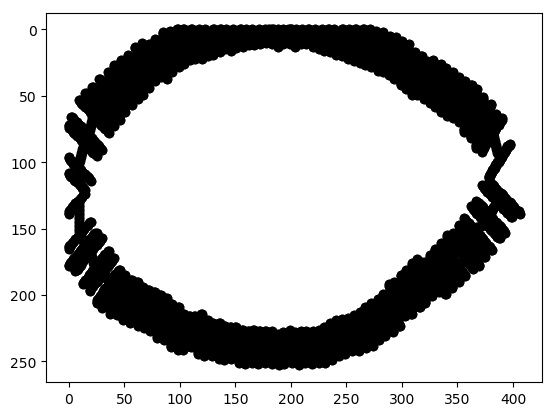

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Define el archivo
filename = "C:\\Users\\Ander\\DLITE\\Notebooks\\Data\\PRUEBA\\RAYAS\\P-T03.txt"

# Inicializa listas para las coordenadas
x_coords = []
y_coords = []

# Abre el archivo y lee las líneas
with open(filename, 'r') as f:
    lines = f.readlines()

# Itera sobre las líneas
for line in lines:
    # Si la línea comienza con 'Tracing', ignórala
    if line.startswith('Tracing'):
        continue
    # Si no, separa la línea en x e y usando la coma como delimitador
    else:
        x, y = line.split(',')
        # Añade las coordenadas a las listas correspondientes
        x_coords.append(int(x))
        y_coords.append(int(y))

# Convierte las listas en arrays de numpy
x_coords = np.array(x_coords)
y_coords = np.array(y_coords)


# Crea un gráfico vacío
fig, ax = plt.subplots()

# Añade los puntos al gráfico
ax.scatter(x_coords, y_coords, color='black')

# Invierte el eje y para que coincida con el formato típico de imagen
ax.invert_yaxis()

# Muestra el gráfico
plt.show()

In [6]:
import matplotlib.pyplot as plt
from PIL import Image

def extract_coords_from_file(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()
    
    coords = []
    for line in lines:
        if not line.startswith('Tracing'):
            x, y = line.strip().split(',')
            coords.append((float(x), float(y)))
    
    return coords

def create_tif_from_coords(coords, output_path):
    # Determina las dimensiones de la imagen basándose en las coordenadas
    width = int(max(coord[0] for coord in coords)) + 1
    height = int(max(coord[1] for coord in coords)) + 1

    # Crea una nueva imagen en negro
    image = Image.new('1', (width, height))

    # Obtén los píxeles de la imagen
    pixels = image.load()

    # Establece los píxeles en las coordenadas dadas a blanco
    for coord in coords:
        x, y = map(int, coord)
        pixels[x, y] = 1  # Los píxeles blancos tienen valor 1 en una imagen en blanco y negro

    # Guarda la imagen
    image.save(output_path)

file_path = r"C:\\Users\\Ander\\DLITE\\Notebooks\\Data\\PRUEBA\\RAYAS\\P-T00.txt"
output_path = r"C:\\Users\\Ander\\DLITE\\Notebooks\\Data\\PRUEBA\\RAYAS\\P-T00.tif"

coords = extract_coords_from_file(file_path)
create_tif_from_coords(coords, output_path)
